<a href="https://colab.research.google.com/github/thargro5/Machine-Learning/blob/main/ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model for x1: y = 5.9279 + -2.0383*x1
Model for x2: y = 0.7361 + 0.5576*x2
Model for x3: y = 2.8714 + -0.5205*x3


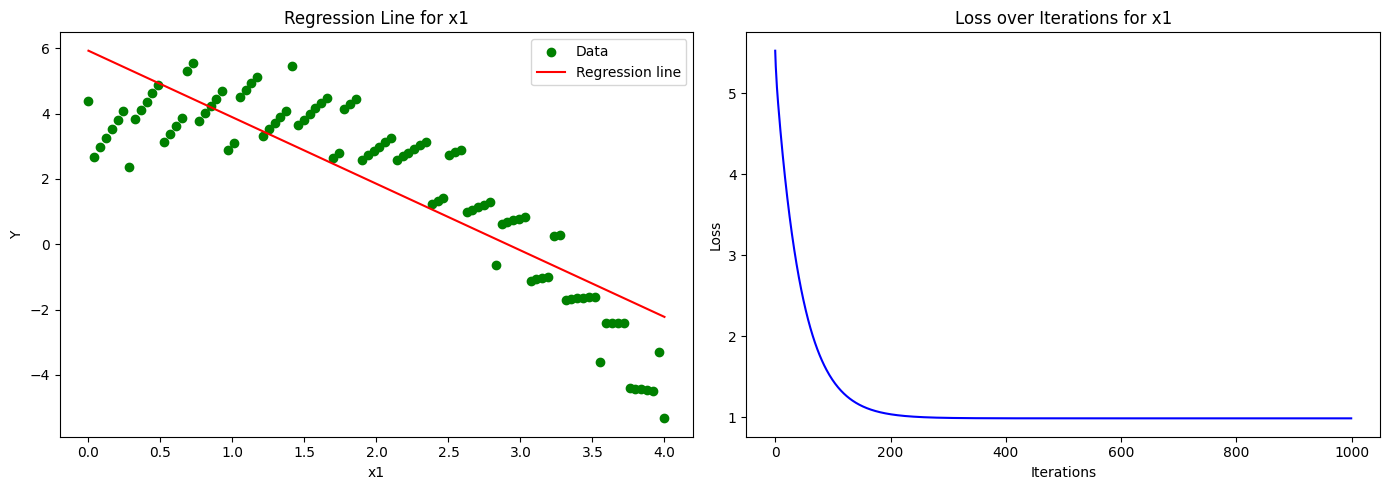

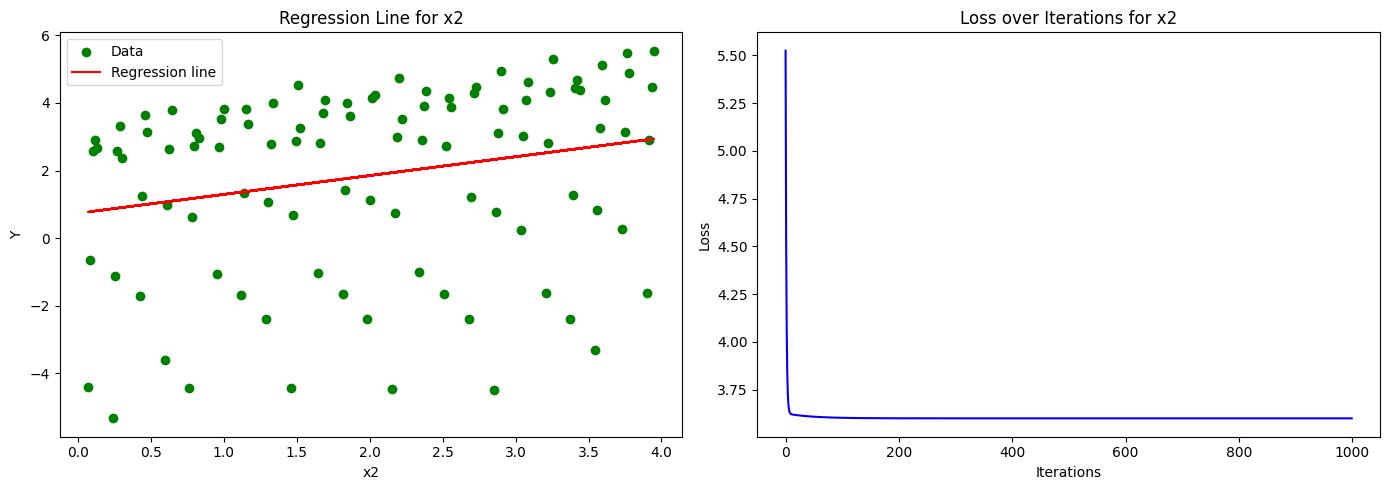

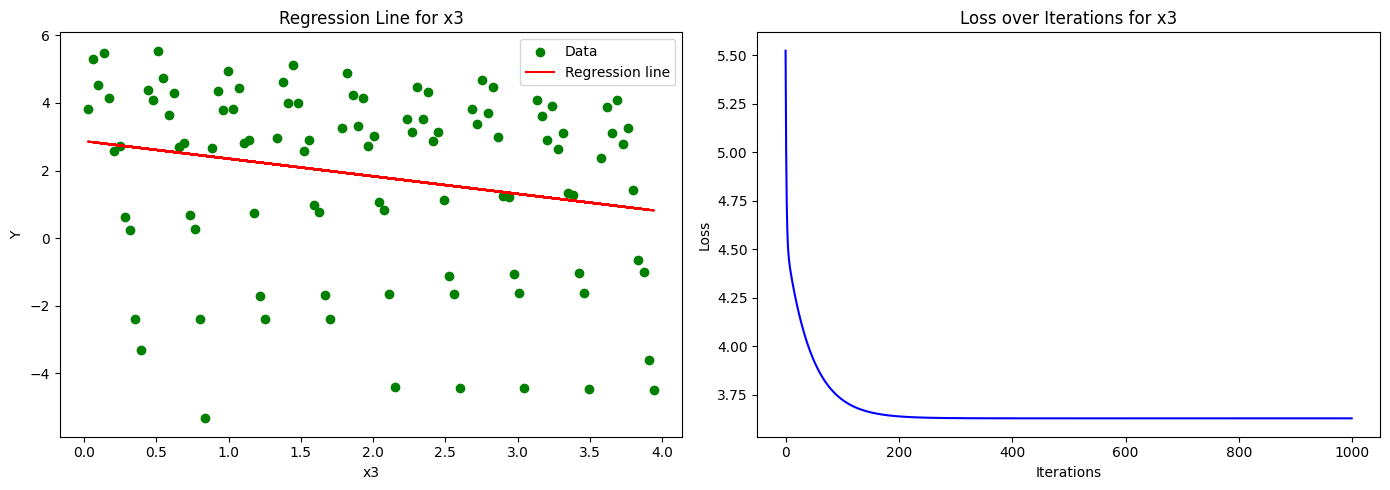

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv"
data = pd.read_csv(url)

# Separate explanatory variables and dependent variable
x1 = data.iloc[:, 0].values
x2 = data.iloc[:, 1].values
x3 = data.iloc[:, 2].values
y = data.iloc[:, 3].values

# Add ones for intercept (theta0)
x1 = np.c_[np.ones(x1.shape[0]), x1]
x2 = np.c_[np.ones(x2.shape[0]), x2]
x3 = np.c_[np.ones(x3.shape[0]), x3]

def gradientDescent(x, y, learnRate, iterations):
    m = len(y)  # Number of samples
    theta = np.zeros(x.shape[1])  # Initialize theta to zeros
    lossHistory = []  # To store the cost/loss at each iteration

    for i in range(iterations):
        # Predict using current theta
        prediction = np.dot(x, theta)

        # Compute the loss (Mean Squared Error)
        loss = (1/(2*m)) * np.sum((prediction - y)**2)
        lossHistory.append(loss)

        # Update theta using the gradient
        gradient = (1/m) * np.dot(x.T, (prediction - y))
        theta -= learnRate * gradient

    return theta, lossHistory

# Settings
iterations = 1000  # Number of iterations for gradient descent
learnRate = 0.01  # You can experiment with different values

# Train for x1
theta_x1, loss_x1 = gradientDescent(x1, y, learnRate, iterations)

# Train for x2
theta_x2, loss_x2 = gradientDescent(x2, y, learnRate, iterations)

# Train for x3
theta_x3, loss_x3 = gradientDescent(x3, y, learnRate, iterations)

# Print the final models (theta values)
print(f"Model for x1: y = {theta_x1[0]:.4f} + {theta_x1[1]:.4f}*x1")
print(f"Model for x2: y = {theta_x2[0]:.4f} + {theta_x2[1]:.4f}*x2")
print(f"Model for x3: y = {theta_x3[0]:.4f} + {theta_x3[1]:.4f}*x3")

# Function to plot the regression model and loss
def plot_results(x, y, theta, loss, feature_name):
    plt.figure(figsize=(14,5))

    # Plot regression line
    plt.subplot(1, 2, 1)
    plt.scatter(x[:, 1], y, color='green', label='Data')
    plt.plot(x[:, 1], np.dot(x, theta), color='red', label='Regression line')
    plt.title(f'Regression Line for {feature_name}')
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Y')
    plt.legend()

    # Plot loss over iterations
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, color='blue')
    plt.title(f'Loss over Iterations for {feature_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

# Plot for x1
plot_results(x1, y, theta_x1, loss_x1, 'x1')

# Plot for x2
plot_results(x2, y, theta_x2, loss_x2, 'x2')

# Plot for x3
plot_results(x3, y, theta_x3, loss_x3, 'x3')

Learning Rate: 0.1, Final Loss: 0.7385
Learning Rate: 0.05, Final Loss: 0.7385
Learning Rate: 0.01, Final Loss: 0.9342

Best Model with Learning Rate 0.1:
Intercept (theta_0): 5.3139
Coefficients: -2.0037, 0.5326, -0.2656


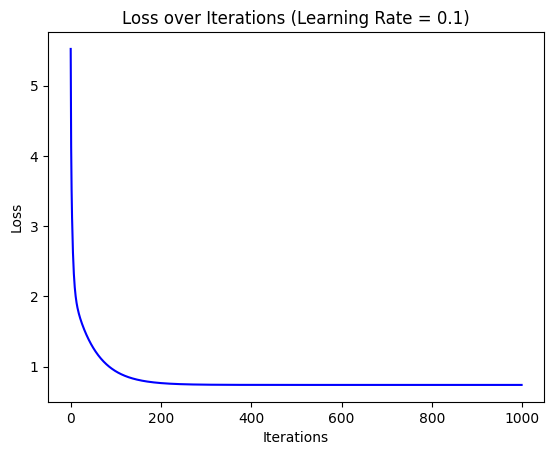

Prediction for X1=1, X2=1, X3=1: 3.5773
Prediction for X1=2, X2=0, X3=4: 0.2443
Prediction for X1=3, X2=2, X3=1: 0.1025


In [5]:

# Separate explanatory variables and dependent variable
X = data.iloc[:, 0:3].values  # All three explanatory variables
y = data.iloc[:, 3].values    # Dependent variable Y

# Add ones for intercept (bias term)
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X

# Gradient Descent Function
def gradientDescent(X, y, learnRate, iterations):
    m = len(y)  # Number of samples
    theta = np.zeros(X.shape[1])  # Initialize theta to zeros (for intercept and coefficients)
    lossHistory = []  # To store the loss at each iteration

    for i in range(iterations):
        # Predict using current theta
        prediction = np.dot(X, theta)

        # Compute the loss (Mean Squared Error)
        loss = (1/(2*m)) * np.sum((prediction - y)**2)
        lossHistory.append(loss)

        # Update theta using the gradient
        gradient = (1/m) * np.dot(X.T, (prediction - y))
        theta -= learnRate * gradient

    return theta, lossHistory

# Settings
iterations = 1000  # Number of iterations for gradient descent
learnRates = [0.1, 0.05, 0.01]  # Different learning rates to explore

# Train with different learning rates
best_theta = None
lowest_loss = float('inf')

for lr in learnRates:
    theta, loss = gradientDescent(X, y, lr, iterations)
    print(f"Learning Rate: {lr}, Final Loss: {loss[-1]:.4f}")

    # Track the best model based on the lowest loss
    if loss[-1] < lowest_loss:
        lowest_loss = loss[-1]
        best_theta = theta
        best_loss = loss
        best_lr = lr

# Print the best model (the one with the lowest final loss)
print(f"\nBest Model with Learning Rate {best_lr}:")
print(f"Intercept (theta_0): {best_theta[0]:.4f}")
print(f"Coefficients: {best_theta[1]:.4f}, {best_theta[2]:.4f}, {best_theta[3]:.4f}")

# Plot loss over the iterations for the best model
plt.plot(range(len(best_loss)), best_loss, color='blue')
plt.title(f'Loss over Iterations (Learning Rate = {best_lr})')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Step 3: Predict the value of y for new (X1, X2, X3) values
def predict(X_new, theta):
    # Add intercept (1) to the new X values
    X_new = np.c_[np.ones(X_new.shape[0]), X_new]
    return np.dot(X_new, theta)

# Test new data points
X_new = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
y_pred = predict(X_new, best_theta)

# Print predictions
for i, val in enumerate(X_new):
    print(f"Prediction for X1={val[0]}, X2={val[1]}, X3={val[2]}: {y_pred[i]:.4f}")